## Plot metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns

### Load data

In [2]:
encode_metrics = pd.read_csv('./encode_metrics.csv', index_col=0)
encode_metrics

,precision,recall,f_score,support,avg_precision
5,0.800000,1.0,0.888889,NaN,0.900000
10,0.700000,1.0,0.823529,NaN,0.850000
15,0.666667,1.0,0.800000,NaN,0.833333
20,0.650000,1.0,0.787879,NaN,0.825000
25,0.600000,1.0,0.750000,NaN,0.800000


In [3]:
social_graph_metrics = pd.read_csv('./social_graph_metrics.csv', index_col=0)
social_graph_metrics

,precision,recall,f_score,support,avg_precision
5,1.000000,1.0,1.000000,NaN,1.000000
10,0.900000,1.0,0.947368,NaN,0.950000
15,0.733333,1.0,0.846154,NaN,0.866667
20,0.650000,1.0,0.787879,NaN,0.825000
25,0.640000,1.0,0.780488,NaN,0.820000


## Plot

In [21]:
def plot_metric(ax, df_encode, df_social_graph, metric_label, title, xlabel, ylabel):
    ax.plot(df_encode[metric_label], label='encode')
    ax.plot(df_social_graph[metric_label], label='social+encode')
    ax.set_xticks(np.arange(min(df_encode.index), max(df_encode.index)+1, 5.0))
    ax.set_yticks(np.arange(0.5, 1.1, 0.1))
    ax.set_title(title, fontsize=20)
    ax.legend(fontsize= 14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    return ax

**Precision**

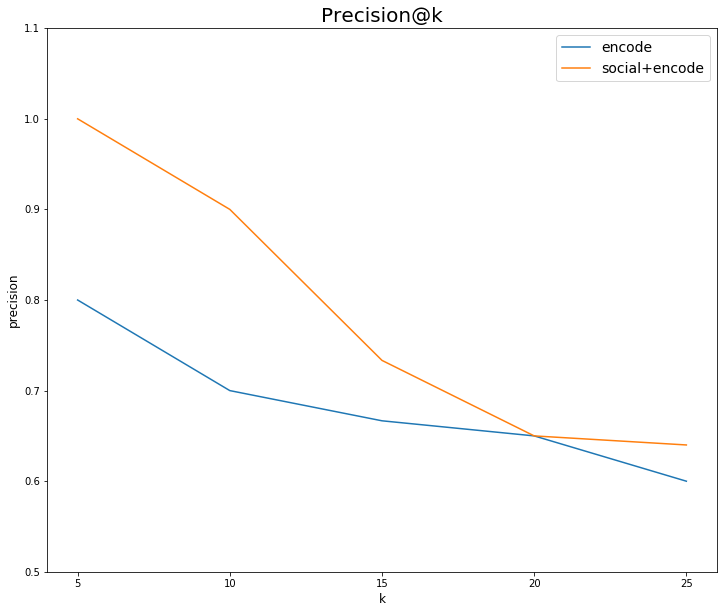

In [22]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax = plot_metric(ax, encode_metrics, social_graph_metrics, 'precision', 'Precision@k', 'k', 'precision')
ax.figure.savefig("precision_k.png")
plt.show()

**F-score**

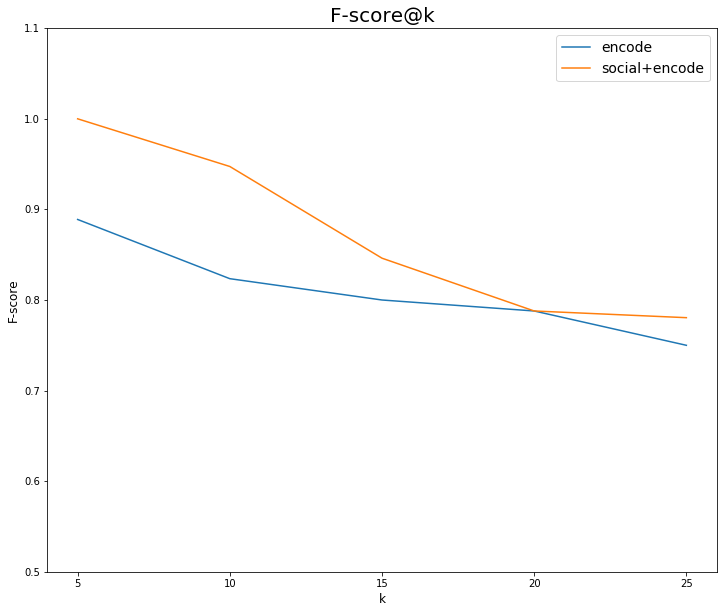

In [23]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax = plot_metric(ax, encode_metrics, social_graph_metrics, 'f_score', 'F-score@k', 'k', 'F-score')
ax.figure.savefig("f_score_k.png")
plt.show()

**Mean average precision**

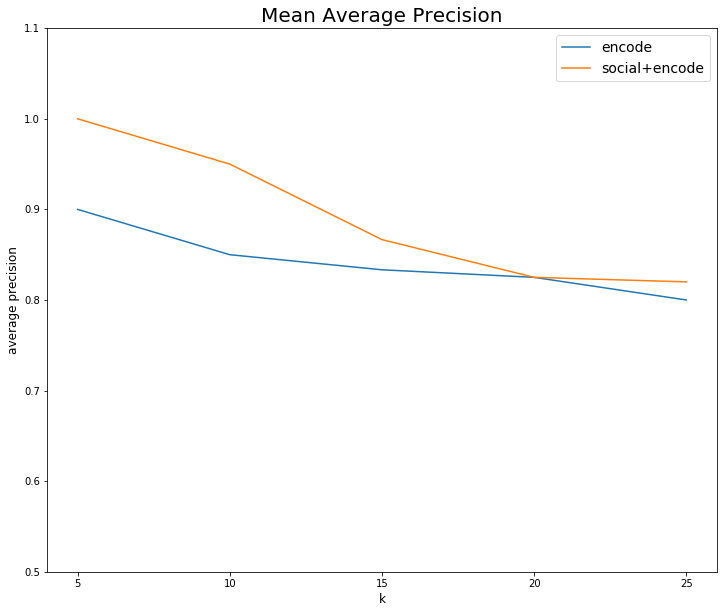

In [25]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax = plot_metric(ax, encode_metrics, social_graph_metrics, 'avg_precision', 'Mean Average Precision', 'k', 'average precision')
ax.figure.savefig("avg_presicion.png")
plt.show()

**All in one figure**

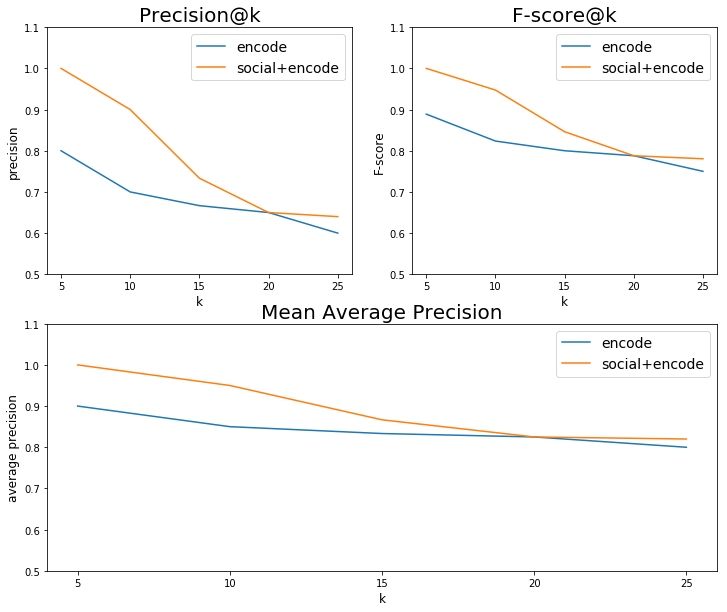

In [26]:
fig = plt.figure(figsize=(12,10))
#Precision
ax = fig.add_subplot(221)
ax = plot_metric(ax, encode_metrics, social_graph_metrics, 'precision', 'Precision@k', 'k', 'precision')


# F1-score
ax = fig.add_subplot(222)
ax = plot_metric(ax, encode_metrics, social_graph_metrics, 'f_score', 'F-score@k', 'k', 'F-score')


#Average Precision
ax = fig.add_subplot(212)
ax = plot_metric(ax, encode_metrics, social_graph_metrics, 'avg_precision', 'Mean Average Precision', 'k', 'average precision')
plt.show()

In [27]:
fig.savefig('all-metrics.png',dpi=100)